In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("MS_Dhoni_ODI_record.csv")

In [4]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [5]:
df['opposition']=df['opposition'].str.replace('v ','',regex=False)
# df['opposition']=df['opposition'].str.replace('v ','')
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [7]:
df['date']=pd.to_datetime(df['date'],dayfirst=True)
df['year']=df['date'].dt.year.astype(int)
print(df.year) #(df['year'])

0      2004
1      2004
2      2004
3      2005
4      2005
       ... 
345    2019
346    2019
347    2019
348    2019
349    2019
Name: year, Length: 350, dtype: int32


In [8]:
df['score']=df['score'].apply(str)
df['not_out']=np.where(df['score'].str.endswith('*'),1,0)
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005,0


In [9]:
df.drop(columns='odi_number',inplace=True)
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0


In [18]:
df_new=df.loc[((df['score']!='DNB')&(df['score']!='TDNB')),'runs_scored':]
df_new.head()

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0


In [20]:
df_new['runs_scored']=df_new['runs_scored'].astype(int)
df_new['balls_faced']=df_new['balls_faced'].astype(int)
df_new['strike_rate']=df_new['strike_rate'].astype(float)
df_new['fours']=df_new['fours'].astype(int)
df_new['sixes']=df_new['sixes'].astype(int)


In [26]:
#career stats
first_match_date=df['date'].dt.date.min().strftime('%B %d %Y') #first match
print('First match: ', first_match_date)
last_match_date=df['date'].dt.date.max().strftime('%B %d %Y') #last match
print('Last match: ', last_match_date)
number_of_matches=df.shape[0] #number of matches played
print('Number of matches:',number_of_matches)

First match:  December 23 2004
Last match:  July 09 2019
Number of matches: 350


In [30]:
number_of_inns=df_new.shape[0] #number of innings
print('Number of innings:',number_of_inns)
not_outs=df_new['not_out'].sum() #numberof not outs in career
print('Not outs: ',not_outs)
runs_scored=df_new['runs_scored'].sum() #runs scored in career
print('Runs scored in career: ',runs_scored)

Number of innings: 297
Not outs:  84
Runs scored in career:  10773


In [40]:
balls_faced=df_new['balls_faced'].sum()
number_of_inss_not_outs=df_new['not_out'].sum()

In [44]:
career_sr=(runs_scored/balls_faced)*100 #career strike rate
print('Career strike rate: {:.2f}'.format(career_sr))
career_avg=(runs_scored/(number_of_inss_not_outs)) #career average
print(f'Career strike rate: {number_of_inss_not_outs:.2f}')

Career strike rate: 87.56
Career strike rate: 84.00


In [56]:
hundreds=(df_new['runs_scored']>=100).sum()
print('Number of 100s:',hundreds)
fifties=((df_new['runs_scored']>=50) &(df_new['runs_scored']<100)).sum()
print('Number of 50s:',fifties)
fours=df_new['fours'].sum()
print('Number of 4s: ', fours)
sixes=df_new['sixes'].sum()
print('Number of 6s',sixes)

Number of 100s: 10
Number of 50s: 73
Number of 4s:  826
Number of 6s 229


In [58]:
#Count the coccurences of each unique value in the opposition column
#opposition_counts will be a series with a labelled index as opposition
opposition_counts=df['opposition'].value_counts()
print(opposition_counts)

opposition
Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Hong Kong        2
Ireland          2
Afghanistan      2
Bermuda          1
Scotland         1
Netherlands      1
U.A.E.           1
Name: count, dtype: int64


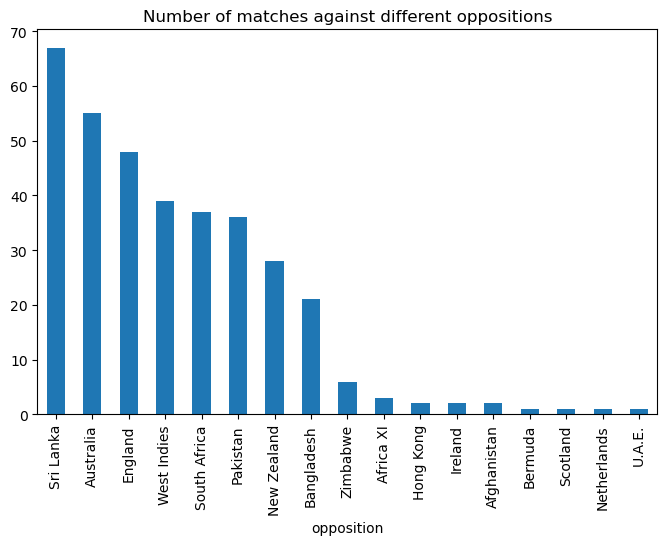

In [80]:
#Plot as bar graph
opposition_counts.plot(kind='bar', title='Number of matches against different oppositions', figsize=(8,5))
plt.show()

In [82]:
#Run scored against each team
#Group the DataFrame by 'opposition' column
grouped_by_opposition=df_new.groupby('opposition')
#Sum the 'runs_scored' column for each group
sum_of_runs_scored=grouped_by_opposition['runs_scored'].sum()
print(sum_of_runs_scored)

opposition
Afghanistan       36
Africa XI        174
Australia       1660
Bangladesh       569
Bermuda           29
England         1546
Hong Kong        109
Ireland           34
Netherlands       19
New Zealand      940
Pakistan        1231
South Africa     830
Sri Lanka       2383
West Indies     1005
Zimbabwe         208
Name: runs_scored, dtype: int32


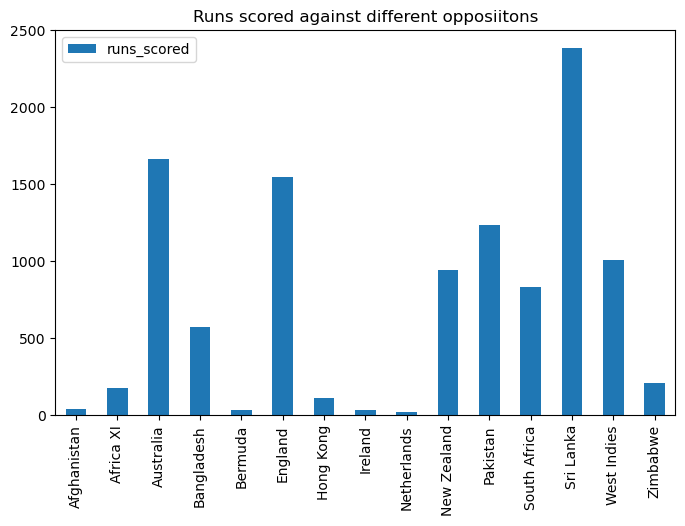

In [88]:
runs_scored_by_opposition=pd.DataFrame(sum_of_runs_scored).reset_index()
runs_scored_by_opposition.plot(x='opposition',kind='bar',title='Runs scored against different opposiitons', figsize=(8,5))
plt.xlabel(None);
plt.show()

#### Series